귀하의 생년월일을 띄어쓰기 없이 숫자만 입력해주십시오.  ex.yyyymmdd   19980217


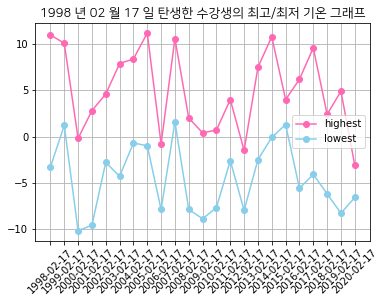

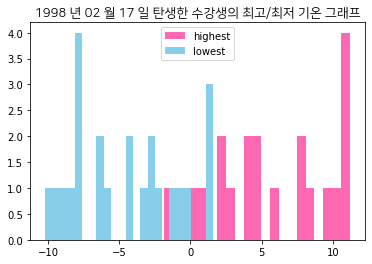

In [4]:
import csv
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. 수강생의 생년월일을 입력 받는다.
birth = input('귀하의 생년월일을 띄어쓰기 없이 숫자만 입력해주십시오.  ex.yyyymmdd   ')
file = open('2017110059.csv', 'r', encoding = 'cp949')
data = csv.reader(file)
next(data)
max = [] # 최고 기온 배열 변수
min = [] # 최저 기온 배열 변수
date_label = []

# 2. 최고 기온(row[-1])이었던 날과 그 기온을 찾는다.
# 3. 최저 기온(row[-2])이었던 날과 그 기온을 찾는다. 
for row in data:
    if row[-1] != '' and row[-2] != '':
        date = row[0].split('-')
        if birth[0:4] <= date[0] and birth[0:4] <= '2020': #출생년도 ~ 2020년 데이터
            if date[1] == birth[4:6] and date[2] == birth[6:8]: #입력받은 생년의 월, 일이라면
                max.append(float(row[-1]))
                min.append(float(row[-2]))
                date_label.append(row[0])
                
# matplotlib에서 사용 가능한 한글 지원 ttf 폰트가 없어 직접 지정한다.
path = '/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareRegular.ttf'
fontprop = fm.FontProperties(fname=path, size=13)

# 4. 꺾은선 그래프 그리기
x = date_label
plt.title(birth[0:4]+' 년 '+birth[4:6]+' 월 '+birth[6:8]+' 일 탄생한 수강생의 최고/최저 기온 그래프', fontproperties=fontprop) #문자열 인덱스로 자르기
plt.plot(max, 'hotpink', marker='o', label='highest') # 동그라미 마커 표시
plt.plot(min, 'skyblue', marker='o', label='lowest') # 동그라미 마커 표시
plt.xticks([i for i in range(len(x))], x, fontsize='10', rotation=45) # x축 범주의 좌표와 범주 라벨 재설정
plt.grid(True) # 그리드 보이게 하기
plt.legend() # 범례 표시
plt.savefig(birth+'_graph.png', dpi=300)
plt.show()

# 5. 히스토그램 표현하기
plt.title(birth[0:4]+' 년 '+birth[4:6]+' 월 '+birth[6:8]+' 일 탄생한 수강생의 최고/최저 기온 그래프', fontproperties=fontprop)
plt.hist(max, bins=len(max), color='hotpink', label='highest')
plt.hist(min, bins=len(min), color='skyblue', label='lowest')
plt.legend()
plt.savefig(birth+'_histogram.png', dpi=300)
plt.show()